# Data cleaning by example

We're going to cover data cleaning by an example. Primarily, you're going to work in `pandas`, a library for manipulating tabular data.

## Imports and files
+ The first thing we'll try is loading some data and plotting it. 
+ Let's load up `pandas` for data manipulation and `matplotlib` for plotting 
+ The python command for this is `import`

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl #bad practice, do not use "as" if you're not using the standard abbreviation (np, pd) for code reusability issues

**do not use "as" if you're not using the standard abbreviation (np, pd) for code reusability issues**

## Reading data in with pandas

Let's now read in an MRICloud dataset using pandas. We want to use the function `read_csv` within pandas. Notice we imported pandas `as pd` so the command is `pd.read_csv`. Also, pandas can accept URLs, so we just put the link to the file in the argument. The data we want to read in is in a github repo I created.

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv")

**<u>Note:</u> *read_csv* should only be used with a URL that points to the raw data of an online csv file. For example th URL pointing to the Github page of a csv file does not work. To get a usable URL, press on "Raw" on top right of CSV.**

A dataframe is a rectangle of data where columns can be different datatypes (compared to a matrix)

## Guidelines for spreadsheets loaded into pandas

- No figures
- column names are lowercase, no spaces, words seperated by underscores
- missing value should not be coded by a huge number but rather a letter code (ex: "N/A" instead of "8888")
- Excel and other files have junk at the bottom of files, some pandas options are available to skip a number of first or last liness

Let's look at the first 4 rows of our dataframe. The object `dataset` is a `pandas` object with associated methods. One is `head` which allows one to see the first few rows of data. 

In [13]:
df.head(4)

Unnamed: 0                 rawid              roi  volume  min  max  \
0           1  kirby127a_3_1_ax.img  Telencephalon_L  531111    0  374   
1           2  kirby127a_3_1_ax.img  Telencephalon_R  543404    0  300   
2           3  kirby127a_3_1_ax.img   Diencephalon_L    9683   15  295   
3           4  kirby127a_3_1_ax.img   Diencephalon_R    9678   10  335   

       mean      std  type  level  
0  128.3013  51.8593     1      1  
1  135.0683  53.6471     1      1  
2  193.5488  32.2733     1      1  
3  193.7051  32.7869     1      1

Regions of the brain with volume, min/max/mean/std of image pixels.Type and Level represent hierarchal organization of the brain.

**<u> Note </u>: when there is a leading comma in the csv file, a new Unnamed column is introduced, sould be removed with drop method**

# Working with the data

Let's get rid of the column `rawid` and the unnamed column since they're kind of useless for today's lecture. Also let's work with only the volume.

In [14]:
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)

**<u> Note </u>: When using a method, I should always check the documentation to know if the method returns an entirely new dataframe or if it overwrites the existing one**

Now let's create a column called `icv` for intra-cranial volume. ICV is defined as the summ of the Type I Level 1 structures and cerebrospinal fluid. For the rest of this lecture, we're just going to look at this type and level.

**<u> Note </u>: loc should be used for truth expressions like in that example. It creates a COPY of the dataframe. It is not a view object of the df dataframe. So here we would not need to include .copy(). However, you can always add it to be safe and be sure you won't be editing the original dataframe.** 

<u>Referencing columns:</u> you should always reference the column using df["type"] and not df.type. The first one always works independently of column name.

In [15]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)].copy()
## Create a new column based on ICV, a column identical for every line.
t1l1 = t1l1.assign(icv = sum(t1l1.volume))
# or t1l1["icv"] = sum(t1l1.volume) is easier
t1l1

roi  volume  type  level      icv
0  Telencephalon_L  531111     1      1  1378295
1  Telencephalon_R  543404     1      1  1378295
2   Diencephalon_L    9683     1      1  1378295
3   Diencephalon_R    9678     1      1  1378295
4    Mesencephalon   10268     1      1  1378295
5    Metencephalon  159402     1      1  1378295
6   Myelencephalon    4973     1      1  1378295
7              CSF  109776     1      1  1378295

Let's access a specific element by column and line.

In [21]:
print(t1l1["volume"][0])

531111


Now the TBV is defined as the sum of the volume for all rows except CSF. 

In [16]:
t1l1 = t1l1.assign(tbv = sum(t1l1["volume"][(t1l1.roi != 'CSF')]))
# I slice the t1l1 dataframe to take only the volume column but I do not want to take all of it. t1l1.roi != 'CSF' creates a truth array of 6 elements.
# We then slice the t1l1 to take only the values that respect the condition.
t1l1

roi  volume  type  level      icv      tbv
0  Telencephalon_L  531111     1      1  1378295  1268519
1  Telencephalon_R  543404     1      1  1378295  1268519
2   Diencephalon_L    9683     1      1  1378295  1268519
3   Diencephalon_R    9678     1      1  1378295  1268519
4    Mesencephalon   10268     1      1  1378295  1268519
5    Metencephalon  159402     1      1  1378295  1268519
6   Myelencephalon    4973     1      1  1378295  1268519
7              CSF  109776     1      1  1378295  1268519

Let's look at brain composition.

In [17]:
t1l1 = t1l1.assign(comp = lambda x: x.volume / x.tbv)
t1l1

roi  volume  type  level      icv      tbv      comp
0  Telencephalon_L  531111     1      1  1378295  1268519  0.418686
1  Telencephalon_R  543404     1      1  1378295  1268519  0.428377
2   Diencephalon_L    9683     1      1  1378295  1268519  0.007633
3   Diencephalon_R    9678     1      1  1378295  1268519  0.007629
4    Mesencephalon   10268     1      1  1378295  1268519  0.008094
5    Metencephalon  159402     1      1  1378295  1268519  0.125660
6   Myelencephalon    4973     1      1  1378295  1268519  0.003920
7              CSF  109776     1      1  1378295  1268519  0.086539

# Plotting

Pandas has built in methods for plotting. Later on, we'll try different plotting packages. 

<Axes: xlabel='roi'>

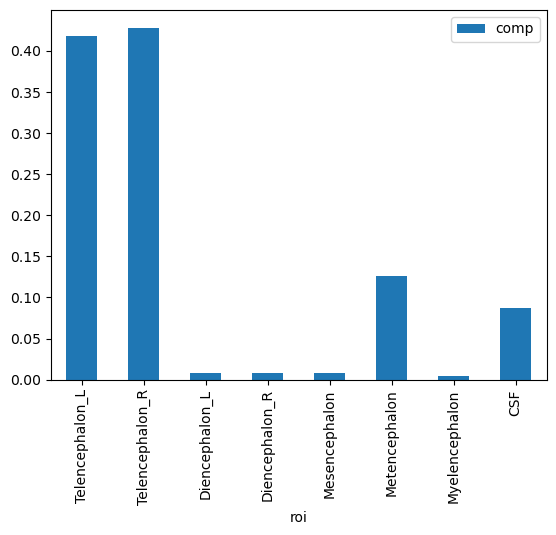

In [22]:
t1l1.plot.bar(x='roi',y='comp')

<u>**plotly:**</u> used for interactive plots.

In [19]:
#!pip install plotly==4.0.0
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
myplot = px.bar(t1l1, x='roi', y='volume')
myplot.show()